In [43]:
from template import *
import utils as utl

Define template parameters

In [44]:
gp = 0.5
ga = 0.05
wp = 1000
wa = 2000
template_type = TemplateType.LP
approximation_function = ApproximationFunction.Butter

template = Template(ga, gp, [wp, wa], template_type)
template.set_approximation_function(approximation_function)

Once a template is created, the xi and the order are calculated for the selected approximation function

In [45]:
template.find_xi()
template.find_n()

ipd.display(template.xi_val, "Xi")
ipd.display(template.order, "Order")

'Xi'

'Order'

Then, the approximation function is calculated and the F(w) is calculated.

In [46]:
template.get_correct_approx_function()
template.generate_fw_function()

ipd.display(template.approximation_function_expr, "Approximation Function")
ipd.display(template.fw_function, "F(w) Function")

'Approximation Function'

'F(w) Function'

Then, the G(s) = F(s/j) is calculated and its pz map is drawn

In [47]:
template.generate_gs_function()

ipd.display(template.gs_function, "G(s) Function")

'G(s) Function'

Finally, the final transfer function is generated by culling the poles with positive real part

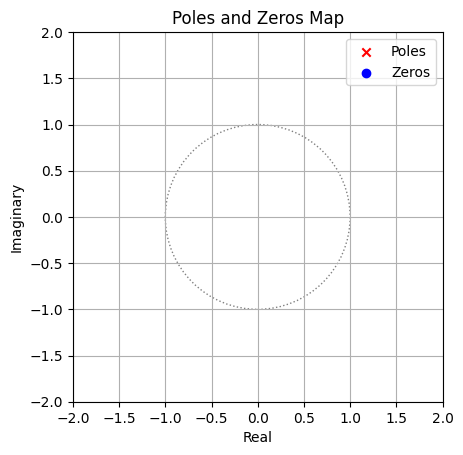

'Poles:'

'1) Wo:871.6855428717354, Phase:1.963495408493622, Q:1.3065629648763724'

'2) Wo:871.6855428717354, Phase:-1.963495408493622, Q:1.3065629648763728'

'3) Wo:871.6855428717372, Phase:2.7488935718910654, Q:0.5411961001461978'

'4) Wo:871.6855428717372, Phase:-2.7488935718910654, Q:0.5411961001461979'

'Zeros:'

'Transfer Function Absolute Value'

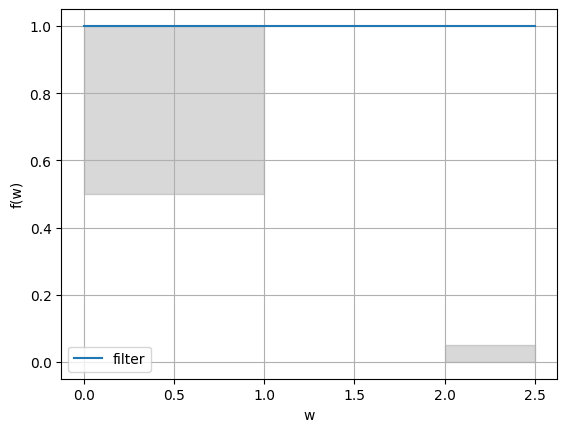

In [48]:
template.generate_final_tf()
utl.print_pzm(template.final_function)
template.print_filter(normalized=True)
# template.show_transformations()

Finally, the bode diagram of the filter is the following:

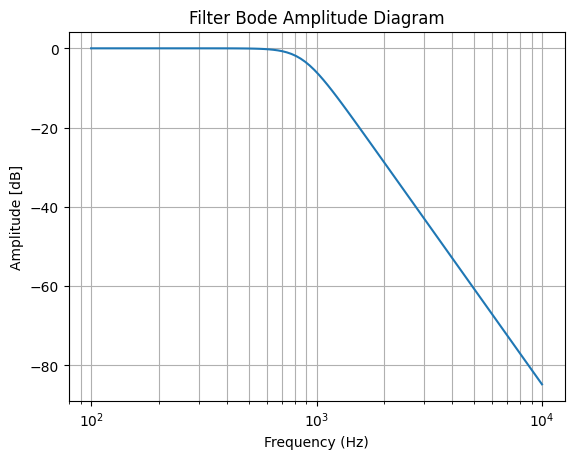

In [49]:
utl.print_bode(template.final_function)